## Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")

In [3]:
data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4109,63,retired,married,high.school,no,no,no,cellular,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.740,5017.5,no
4110,53,housemaid,divorced,basic.6y,unknown,unknown,unknown,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4111,30,technician,married,university.degree,no,no,yes,cellular,jun,fri,...,1,999,1,failure,-1.7,94.055,-39.8,0.748,4991.6,no
4112,31,technician,single,professional.course,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4113,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["y"] = (data["y"]=="yes").astype(int)

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [8]:
data.tail(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4019,23,student,single,high.school,no,no,no,cellular,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.270,5099.1,0
4020,50,blue-collar,divorced,high.school,unknown,no,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4021,54,technician,married,high.school,unknown,yes,yes,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
4022,38,technician,divorced,professional.course,no,no,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0
4023,33,blue-collar,married,basic.9y,no,unknown,unknown,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0


In [9]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [10]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [11]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [12]:
data["y"].value_counts()


0    3668
1     451
Name: y, dtype: int64

In [13]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [14]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

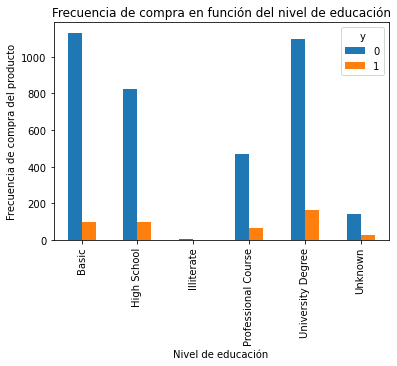

In [15]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0.5, 0, 'Proporción de clientes')

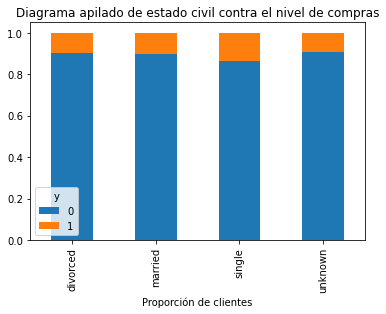

In [16]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
#dividir el resultado de table.sum por filas y el resultado (axis) que lo haga por columnas
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.xlabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

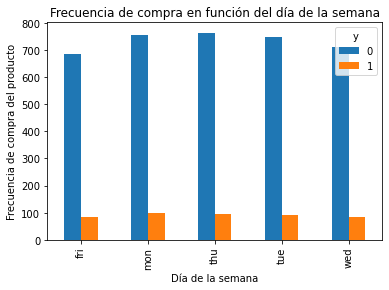

In [17]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

In [18]:
pd.crosstab(data.day_of_week, data.y)

y,0,1
day_of_week,,
fri,685,83
mon,757,98
thu,764,96
tue,750,91
wed,712,83


Text(0, 0.5, 'Frecuencia de compra del producto')

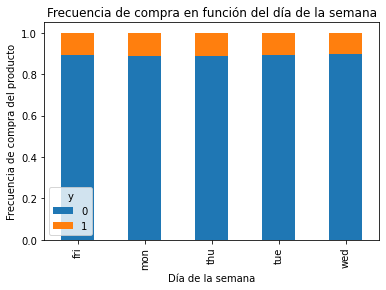

In [19]:
#para hacerlo apilado
%matplotlib inline
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

In [20]:
pd.crosstab(data.month, data.y)

y,0,1
month,,
apr,179,36
aug,572,64
dec,10,12
jul,652,59
jun,462,68
mar,20,28
may,1288,90
nov,403,43
oct,44,25


Text(0, 0.5, 'Frecuencia de compra del producto')

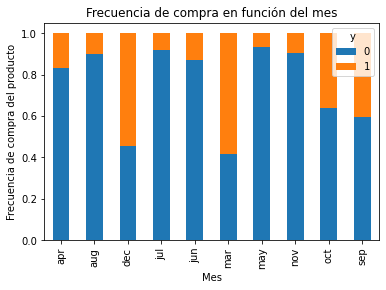

In [21]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

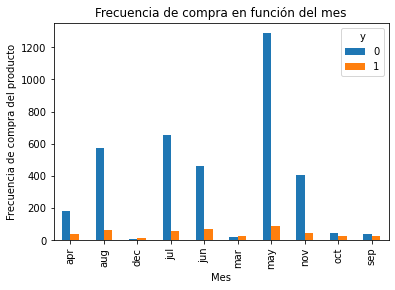

In [22]:
%matplotlib inline
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Clientes')

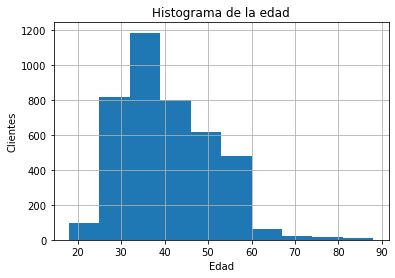

In [23]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Clientes")

<AxesSubplot:xlabel='age'>

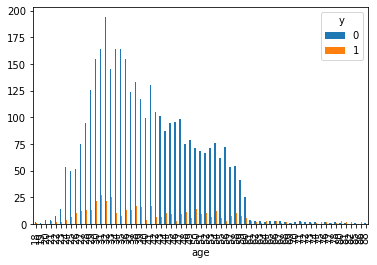

In [24]:
pd.crosstab(data.age, data.y).plot(kind="bar")

In [25]:
pd.crosstab(data.poutcome, data.y)

y,0,1
poutcome,,
failure,387,67
nonexistent,3231,292
success,50,92


<AxesSubplot:xlabel='poutcome'>

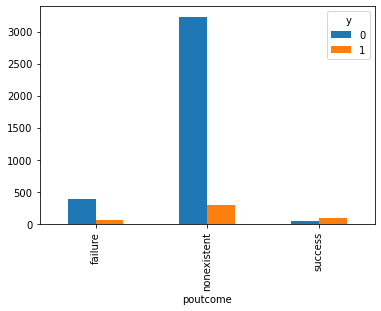

In [26]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

### conversión de variables categóricas a dummies

In [27]:
categories = ["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new 

In [28]:
data_new


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,Basic,no,yes,yes,cellular,jul,thu,...,0,0,0,0,1,0,0,0,1,0
4115,39,admin.,married,High School,no,yes,no,telephone,jul,fri,...,0,0,1,0,0,0,0,0,1,0
4116,27,student,single,High School,no,no,no,cellular,may,mon,...,0,0,0,1,0,0,0,1,0,0
4117,58,admin.,married,High School,no,no,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,1,0


In [29]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may

In [30]:
# para retirar las columnas iniciales (porque ya no van a servir)...
data_vars = data.columns.values.tolist()



In [31]:
to_keep = [v for v in data_vars if v not in categories and v != 'default']

In [32]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [33]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [34]:
n = 12

In [35]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [36]:
lr = LogisticRegression()

In [37]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel()) 
 #values.ravel() porque el vector está en filas y lo espera en columnas

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [38]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [39]:
print(rfe.ranking_)

[38 37 18 45  1 17 25 22  1 34  2  8  5 39  7  1  6 24 43  1  1 41 15 26
 30 47 33 12 46 19 32  4  9 14 44 13 20 31 11  3 36 21  1  1  1  1  1 23
 40 42 29 27 28 35 10  1 16  1]


In [40]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [41]:
list(z)

[('age', False, 38),
 ('duration', False, 37),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 17),
 ('cons.price.idx', False, 25),
 ('cons.conf.idx', False, 22),
 ('euribor3m', True, 1),
 ('nr.employed', False, 34),
 ('y', False, 2),
 ('job_admin.', False, 8),
 ('job_blue-collar', False, 5),
 ('job_entrepreneur', False, 39),
 ('job_housemaid', False, 7),
 ('job_management', True, 1),
 ('job_retired', False, 6),
 ('job_self-employed', False, 24),
 ('job_services', False, 43),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 41),
 ('job_unknown', False, 15),
 ('marital_divorced', False, 26),
 ('marital_married', False, 30),
 ('marital_single', False, 47),
 ('marital_unknown', False, 33),
 ('education_Basic', False, 12),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 19),
 ('education_Professional Course', False, 32),
 ('education_University Degree', False, 4),
 ('education_Unkno

In [42]:
cols = ["previous", "euribor3m", "job_management", "job_student", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [43]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo en Python con statsmodel.api

In [44]:
import statsmodels.api as sm


In [45]:
logit_model = sm.Logit(Y, X)

In [46]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.293076
         Iterations 7


In [47]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.152     
Dependent Variable:   y                 AIC:               2438.3612 
Date:                 2021-05-26 05:48  BIC:               2514.2415 
No. Observations:     4119              Log-Likelihood:    -1207.2   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       1.2526e-85
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1355   0.0700  -1.9360 0.0529 -0.2727  0.0017
euribor3m            -0.6302   0.0383 -16.4503 0.0000 -0.7053 -0.5551
job_management       -0.3038   0.2149  -1.4136 0.1575 -0.7250  0.1174
job_student          -0.2629   0.2954  -0.8903 0.3733 -0.8418  0.3159
month_aug             0.7474   0.1749   4.2728 0.0000  0.4046  1.0903
month_dec             1.2312   0.4478   2.7494 0.0060  0.3535  2.1089
month_jul             1.1124   0.1910   5.8236 0.0000  0.7380  1.4867
month_jun             1.1368   0.1750   6.4941 0.0000  0.7937  1.4799
month_mar             1.7051   0.3160   5.3953 0.0000  1.0857  2.3246
month_nov             0.4637   0.1958   2.3677 0.0179  0.0798  0.8475
day_of_week_wed      -0.0859   0.1386  -0.6198 0.5354 -0.3577  0.1858
poutcome_nonexistent -0.7974   0.1203  -6.6287 0.0000 -1.0332 -0.5616
=====================================================================

"""

### Implementación del modelo en python con Scikit-learn

In [48]:
from sklearn import linear_model

In [49]:
logit_model2 = linear_model.LogisticRegression()
logit_model2.fit(X,Y)

LogisticRegression()

In [50]:
logit_model2.score(X,Y)

0.8975479485311969

In [51]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model2.coef_))))

,0,1
0,previous,[0.5613308954492751]
1,euribor3m,[-0.5605314062517133]
2,job_management,[-0.2968207896355843]
3,job_student,[-0.03944000646483915]
4,month_aug,[0.7308875857650319]
5,month_dec,[1.277299705042632]
6,month_jul,[1.0103858451500853]
7,month_jun,[1.0914882943168347]
8,month_mar,[1.6803107025855135]
9,month_nov,[0.5116169615021827]


## Validación del modelo

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [54]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [55]:
from IPython.display import display, Math, Latex

In [56]:
display(Math(r'Y_p\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [57]:
probs = lm.predict_proba(X_test)

In [58]:
probs

array([[0.93876515, 0.06123485],
       [0.87346814, 0.12653186],
       [0.93557834, 0.06442166],
       ...,
       [0.67964381, 0.32035619],
       [0.97578148, 0.02421852],
       [0.58842979, 0.41157021]])

In [59]:
prediction = lm.predict(X_test)

In [60]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
display(Math(r'\varepsilon\in (0,1), Y_p\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p> \varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [62]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.061235,0
1,0.126532,1
2,0.064422,0
3,0.058874,0
4,0.056843,0


In [63]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [64]:
390/len(prob_df)*100

31.55339805825243

In [65]:
threshold2 = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold2, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,899
1,337


In [66]:
337/len(prob_df)*100

27.26537216828479

In [67]:
threshold3 = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold3, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,422
1,814


In [68]:
814/len(prob_df)*100

65.85760517799353

In [69]:
from sklearn import metrics


In [70]:
metrics.accuracy_score(Y_test, prediction)

0.9037216828478964

## Validación cruzada

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [73]:
scores

array([0.90776699, 0.88834951, 0.90533981, 0.8907767 , 0.89805825,
       0.89805825, 0.88592233, 0.89320388, 0.89320388, 0.89537713])

In [74]:
scores.mean()

0.8956056740604257

## Matrices de confusión y curvas ROC

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [76]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [77]:
probs = lm.predict_proba(X_test)

In [79]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)
threshold= 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df

,0,prediction,actual
0,0.061235,0,0
1,0.126532,1,0
2,0.064422,0,0
3,0.058874,0,0
4,0.056843,0,0
...,...,...,...
1231,0.058874,0,0
1232,0.058812,0,0
1233,0.320356,1,0
1234,0.024219,0,0


In [82]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [83]:
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [84]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]

In [86]:
sens = TP / (TP+FN)
sens


0.21025641025641026

In [88]:
espcf_1 = 1-TN/(TN+FP)
espcf_1

0.047281323877068515

In [89]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [90]:
sensitivities

[1,
 0.9508196721311475,
 0.8688524590163934,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6229508196721312,
 0.4918032786885246,
 0.4262295081967213,
 0.3770491803278688,
 0.3524590163934426,
 0.1557377049180328,
 0.11475409836065574,
 0]

In [91]:
especifities_1

[1,
 0.7809694793536804,
 0.6355475763016158,
 0.28186714542190305,
 0.2764811490125674,
 0.27558348294434465,
 0.2342908438061041,
 0.12746858168761221,
 0.0825852782764811,
 0.07091561938958713,
 0.06373429084380611,
 0.024236983842010784,
 0.009874326750448859,
 0]

In [92]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

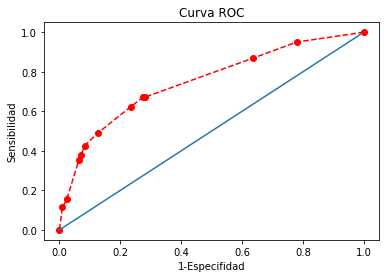

In [93]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [96]:
from sklearn import metrics
from pandas import Timestamp
from ggplot import *

AttributeError: module 'pandas' has no attribute 'tslib'